In [1]:
import tensorflow.examples.tutorials.mnist.input_data as input_data
import neuralnetwork as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
a = np.array([[1,2],[3,4]])
np.sum(a, axis=1)

array([3, 7])

In [149]:
a = nn.NeuralNetwork(784, 1, 1, 10)
X, Y = mnist.train.images, mnist.train.labels
Theta, steps, Js = a.gradient_descent(X, Y, a.ini_Theta, alpha=0.00001, lamda=0, max_step=500)

===== Running Gradient Descent Algorithm with Back Propagation =====
    step: 0, J: 8.402873, α: 0.000010
    step: 5, J: 4.794928, α: 0.000010
    step: 10, J: 3.850861, α: 0.000010
    step: 15, J: 3.543796, α: 0.000010
    step: 20, J: 3.414976, α: 0.000010
    step: 25, J: 3.351066, α: 0.000010
    step: 30, J: 3.315678, α: 0.000010
    step: 35, J: 3.294577, α: 0.000010
    step: 40, J: 3.281258, α: 0.000010
    step: 45, J: 3.272416, α: 0.000010
    step: 50, J: 3.266268, α: 0.000010
    step: 55, J: 3.261797, α: 0.000010
    step: 60, J: 3.258396, α: 0.000010
    step: 65, J: 3.255688, α: 0.000010
    step: 70, J: 3.253435, α: 0.000010
    step: 75, J: 3.251480, α: 0.000010
    step: 80, J: 3.249719, α: 0.000010
    step: 85, J: 3.248075, α: 0.000010
    step: 90, J: 3.246492, α: 0.000010
    step: 95, J: 3.244925, α: 0.000010
    step: 100, J: 3.243335, α: 0.000010
    step: 105, J: 3.241683, α: 0.000010
    step: 110, J: 3.239934, α: 0.000010
    step: 115, J: 3.238048, α: 0.

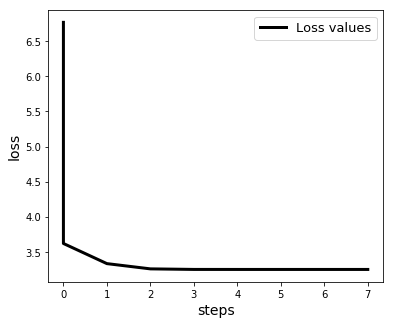

In [143]:
plt.figure(figsize=(6, 5))
plt.plot(steps, Js, color='k', linewidth=3, label='Loss values')
plt.xlabel('steps', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend(fontsize=13)
plt.show()

In [144]:
count = 0
for i in range(mnist.test.num_examples):
    image = mnist.test.images[i]
    label = np.argmax(mnist.test.labels[i])
    if np.argmax(a.forward_propagation(image.reshape(1, 784), Theta)[0]) == label:
        count += 1
print(count / mnist.test.num_examples)

0.1135


预测为: 1 [[ 0.09890847  0.11233531  0.09946767  0.10252591  0.09648315  0.09066453
   0.09846581  0.10387437  0.09798722  0.09916919]]
实际为: 4


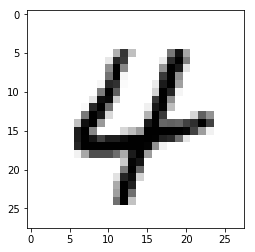

In [148]:
rand_index = np.random.randint(mnist.test.num_examples)
image = mnist.test.images[rand_index]
plt.imshow(image.reshape(28, 28), cmap='binary')
h, A = a.forward_propagation(image.reshape(1, 784), Theta)
print("预测为:", np.argmax(h), h)
print("实际为:", np.argmax(mnist.test.labels[rand_index]))

In [88]:
import tensorflow as tf

In [108]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])
w = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
pred = tf.nn.softmax(tf.matmul(x, w) + b)
loss = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(pred) + (1-y_) * tf.log(1-pred),
                                     reduction_indices=[1]))
optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    steps, loss_vals = [], []
    for i in range(1000):
        xs, ys = mnist.train.next_batch(100)
        sess.run(optimizer, feed_dict={x: xs, y_: ys})
        steps.append(i)
        loss_vals.append(sess.run(loss, {x: xs, y_: ys}))
        if i%50 == 0:
            print("step: %2d, loss:%.4f" %(i, loss_vals[-1]))
    w_mat, b_vec = sess.run([w, b])

step:  0, loss:3.1601
step: 50, loss:1.5264
step: 100, loss:1.0128
step: 150, loss:1.1585
step: 200, loss:0.8204
step: 250, loss:0.7007
step: 300, loss:1.1125
step: 350, loss:0.7321
step: 400, loss:0.7770
step: 450, loss:0.6532
step: 500, loss:0.8347
step: 550, loss:0.7011
step: 600, loss:0.5439
step: 650, loss:0.6819
step: 700, loss:0.7151
step: 750, loss:0.5491
step: 800, loss:0.6455
step: 850, loss:0.6201
step: 900, loss:0.6422
step: 950, loss:0.5701


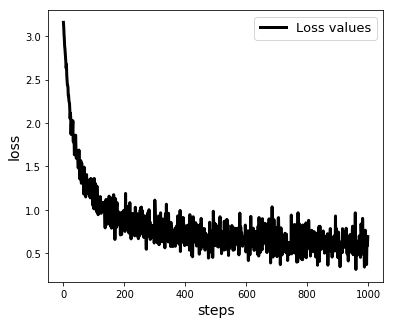

In [109]:
plt.figure(figsize=(6, 5))
plt.plot(steps, loss_vals, color='k', linewidth=3, label='Loss values')
plt.xlabel('steps', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend(fontsize=13)
plt.show()

In [92]:
def forward_propagation(x):
    return np.argmax(np.matmul(x, w_mat) + b_vec)

In [110]:
count = 0
for i in range(mnist.test.num_examples):
    image = mnist.test.images[i]
    label = np.argmax(mnist.test.labels[i])
    if forward_propagation(image) == label:
        count += 1
print(count / mnist.test.num_examples)

0.9074


预测为: 4
实际为: 4


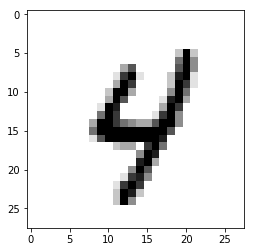

In [156]:
rand_index = np.random.randint(mnist.test.num_examples)
image = mnist.test.images[rand_index]
plt.imshow(image.reshape(28, 28), cmap='binary')
print("预测为:", forward_propagation(image))
print("实际为:", np.argmax(mnist.test.labels[rand_index]))